<figure>
  <IMG src="../figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Book Recommendation System Using Association Rule Learning
<strong>Ralised By : </strong>
<ul>
  <li>Abderrahmane El Mehdi Tahir</li>
  <li>Wassim Rahmoun</li>
  <li>Fakhreddine Frouzi Chaib</li>
</ul>

# Importing and Checking the dataset values

In [1]:
import pandas as pd

In [2]:
data = pd.read_json('reviews.json')

In [3]:
data.head()

,user_id,title,author,rating,image,year,genres
0,1-otis-chandler,The Big Short: Inside the Doomsday Machine,"Lewis, Michael",it was amazing,https://images-na.ssl-images-amazon.com/images...,2010,"[non-fiction, business, economics, finance, hi..."
1,1-otis-chandler,"Surely You're Joking, Mr. Feynman!: Adventures...","Feynman, Richard",it was amazing,https://images-na.ssl-images-amazon.com/images...,1985,"[science, non-fiction, biography, physics, mem..."
2,1-otis-chandler,"Salt, Fat, Acid, Heat: Mastering the Elements ...","Nosrat, Samin",it was amazing,https://images-na.ssl-images-amazon.com/images...,2017,"[cookbooks, cooking, food, non-fiction, scienc..."
3,1-otis-chandler,Rich People Problems,"Kwan, Kevin",liked it,https://images-na.ssl-images-amazon.com/images...,2017,"[fiction, romance, contemporary, audiobook, ch..."
4,1-otis-chandler,Fourth Wing,"Yarros, Rebecca",liked it,https://images-na.ssl-images-amazon.com/images...,2023,"[dragons, romantasy, fiction, audiobook, fanta..."


### Unique Values 

In [4]:
unique_ratings = data['rating'].unique()
print(f'Uniaue Ratings : {unique_ratings}')
print(f'Number of Unique Ratings : {len(unique_ratings)}')


Uniaue Ratings : ['it was amazing' 'liked it' 'really liked it' None 'it was ok'
 'did not like it']
Number of Unique Ratings : 6


In [5]:
unique_years = data['year'].unique()
print(f'Uniaue Years : {unique_years}')
print(f'Number of Unique Years : {len(unique_years)}')

Uniaue Years : [2010 1985 2017 2023 2018 1983 1999 2000 1997 2004 2007 2003 1902 2011
 1927 1595 1914 2006 2008 2002 1952 1994 2009 1960 1988 2001 1993 1000
 1957 1962 1845 1992 2016 1944 1976 1963 1991 1961 1973 1965 2019 1996
 2005 1968 1950 1955 1995 1972 2012 1984 1926 1971 1959 1969 1953 1989
 1939 1859 2013 1998 1987 2015 2022 1982 2020 1941 1937 1967 2024 1920
 1923 1980 1956 1878 2021 1844 2014 1942 1925 1922 1811 1813 1935 1990
 1977 1954 1880 1868 1928 1838 1603 1597 1869 1947 1933 1974 1850 1932
  451 1884 1847 1911 1907 1948 1931 1943 1981 1726 1848 1890  501 1929
 1975 1978 1964 1908 1900 1921 1776 1936 1894 1930 1945 1889 1759 1819
 1979 1951 1855 1886 1856 1915 1876 1986 2050 1938 1854 1817 1814 1815
 1958 1897 1970 1862  401 1843 1866 1966 1623 1871 1892 1918 1455 1899
 1946 1949  125 1605 1870 1916 1934 1852 1873 1791 1645  701 1788 1524
 1940 1812  351 1794 1912 1910 1732  180 1913  801 1903  800 1924  430
 1882 1748 1513 1906 1861 1400 1273 1588 1390 1808 1875 1909 1

In [6]:
unique_authors = data['author'].unique()
print(f'Uniaue Authors : {unique_authors}')
print(f'Number of Unique Authors : {len(unique_authors)}')

Uniaue Authors : ['Lewis, Michael' 'Feynman, Richard' 'Nosrat, Samin' ...
 'Azerrad, Michael' 'Sacco, Joe' 'Davies, Adam']
Number of Unique Authors : 5374


In [7]:
unique_titles = data['title'].unique()
print(f'Uniaue Titles : {unique_titles}')
print(f'Number of Unique Titles : {len(unique_titles)}')

Uniaue Titles : ['The Big Short: Inside the Doomsday Machine'
 "Surely You're Joking, Mr. Feynman!: Adventures of a Curious Character"
 'Salt, Fat, Acid, Heat: Mastering the Elements of Good Cooking' ...
 'The Last of Her Kind' 'Digging to America' 'Holidays on Ice: Stories']
Number of Unique Titles : 9182


In [8]:
unique_genres = set(genre for sublist in data['genres'] for genre in sublist)  # getting all genres ( eliminating genres )
print(f'Unique Genres : {unique_genres}')
print(f'Number of Unique Genres : {len(unique_genres)}')

Unique Genres : {'music', 'international-relations', '20th-century', 'china', 'parenting', 'middle-grade', 'literature', 'new-adult', 'teachers', 'education', 'young-adult', 'italy', 'scandinavian-literature', 'picture-books', 'personal-finance', 'technology', 'buddhism', 'harlequin-blaze', 'high-school', 'utopia', 'academic', 'archaeology', 'algorithms', 'sports', 'engineering', 'apocalyptic', 'green', 'dutch-literature', 'modern', 'true-story', 'political-science', 'burundi', 'money', 'romanian-literature', 'church', 'japan', 'lds', 'albanian-literature', 'mental-health', 'librarianship', 'comic-book', 'academia', 'race', 'urban', 'personal-development', 'judaica', 'social-issues', 'central-africa', 'womens-studies', 'christianity', 'cyberpunk', 'art-design', 'diary', 'conspiracy-theories', 'australia', 'growth-mindset', 'moroccan', 'beer', 'womens', 'ghana', 'cult-classics', 'food-and-drink', 'latino', 'vegetarian', 'angels', 'superman', 'superheroes', 'victorian', 'retellings', 'ma

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10278 entries, 0 to 10277
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  10278 non-null  object
 1   title    10278 non-null  object
 2   author   10278 non-null  object
 3   rating   6766 non-null   object
 4   image    10278 non-null  object
 5   year     10278 non-null  int64 
 6   genres   10278 non-null  object
dtypes: int64(1), object(6)
memory usage: 562.2+ KB


<h1>Genres Encoding</h1>

In [10]:
# We remove brackets, seperate genres and encode them with dummy encoding 
dummies = data['genres'].astype(str).str.replace(r'[\[\]]', '', regex=True)
dummies = dummies.str.get_dummies(sep=',')

In [11]:
dummies

,'15th-century','16th-century','17th-century','18th-century','19th-century','20th-century','21st-century','2nd-grade','abuse','academia',...,'urban-studies','vampires','website-design','westerns','wicca','wine','world-war-ii','writing','young-adult','zombies'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10275,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10276,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#We Add the dummies to old data 
new_data = pd.merge(data, dummies, left_index=True, right_index=True)

In [13]:
new_data

,user_id,title,author,rating,image,year,genres,'15th-century','16th-century','17th-century',...,'urban-studies','vampires','website-design','westerns','wicca','wine','world-war-ii','writing','young-adult','zombies'
0,1-otis-chandler,The Big Short: Inside the Doomsday Machine,"Lewis, Michael",it was amazing,https://images-na.ssl-images-amazon.com/images...,2010,"[non-fiction, business, economics, finance, hi...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1-otis-chandler,"Surely You're Joking, Mr. Feynman!: Adventures...","Feynman, Richard",it was amazing,https://images-na.ssl-images-amazon.com/images...,1985,"[science, non-fiction, biography, physics, mem...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1-otis-chandler,"Salt, Fat, Acid, Heat: Mastering the Elements ...","Nosrat, Samin",it was amazing,https://images-na.ssl-images-amazon.com/images...,2017,"[cookbooks, cooking, food, non-fiction, scienc...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1-otis-chandler,Rich People Problems,"Kwan, Kevin",liked it,https://images-na.ssl-images-amazon.com/images...,2017,"[fiction, romance, contemporary, audiobook, ch...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1-otis-chandler,Fourth Wing,"Yarros, Rebecca",liked it,https://images-na.ssl-images-amazon.com/images...,2023,"[dragons, romantasy, fiction, audiobook, fanta...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10273,262-jamie,After Henry: Essays,"Didion, Joan",None,https://images-na.ssl-images-amazon.com/images...,1992,"[essays, non-fiction, politics, journalism, me...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,263-leah,"No god but God: The Origins, Evolution and Fut...","Aslan, Reza",really liked it,https://images-na.ssl-images-amazon.com/images...,2005,"[religion, non-fiction, history, islam, politi...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10275,263-leah,The Last of Her Kind,"Nunez, Sigrid",it was amazing,https://images-na.ssl-images-amazon.com/images...,2005,"[fiction, historical-fiction, literary-fiction...",0,0,0,...,0,0,0,0,0,0,0,0,0,0
10276,263-leah,Digging to America,"Tyler, Anne",really liked it,https://images-na.ssl-images-amazon.com/images...,2006,"[fiction, adoption, contemporary, audiobook, f...",0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature selection ( selecting needed data )

In [14]:
# We remove non-important data in training
new_data = new_data.drop(['genres', 'image', 'title', 'author', 'year'], axis=1)

/home/mahdiiii04/.local/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


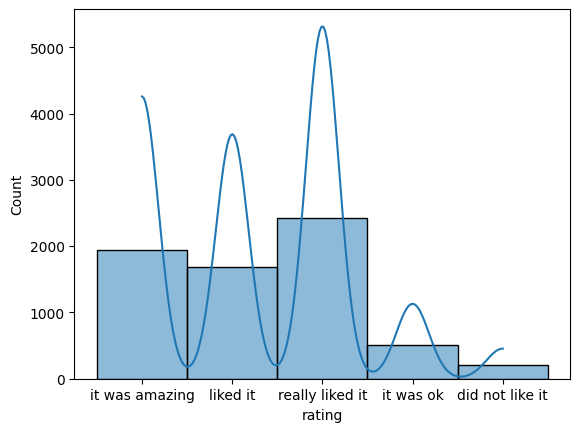

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['rating'].dropna(), kde=True)
plt.show()

In [16]:
# We only keep relevent rows in which the user enjoyed the book
new_data = new_data[new_data['rating'].isin(['really liked it', 'it was amazing'])]

In [17]:
new_data = new_data.drop(['rating'], axis=1)
new_data

,user_id,'15th-century','16th-century','17th-century','18th-century','19th-century','20th-century','21st-century','2nd-grade','abuse',...,'urban-studies','vampires','website-design','westerns','wicca','wine','world-war-ii','writing','young-adult','zombies'
0,1-otis-chandler,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1-otis-chandler,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1-otis-chandler,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1-otis-chandler,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1-otis-chandler,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10267,262-jamie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10270,262-jamie,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10274,263-leah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10275,263-leah,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Grouping rows by user and applying the Sum to them

In [18]:
grouped = new_data.groupby(new_data['user_id'])[new_data.drop('user_id', axis=1).columns].sum()

In [19]:
grouped

,'15th-century','16th-century','17th-century','18th-century','19th-century','20th-century','21st-century','2nd-grade','abuse','academia',...,'urban-studies','vampires','website-design','westerns','wicca','wine','world-war-ii','writing','young-adult','zombies'
user_id,,,,,,,,,,,,,,,,,,,,,
1-otis-chandler,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,0
103-alexandra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
104-daniel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106-andrew,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108-myriam,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92-forest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95-kirk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96-ray,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
grouped[grouped > 1] = 1  # limit values to 0 and 1

# Visualising Genres

<Axes: >

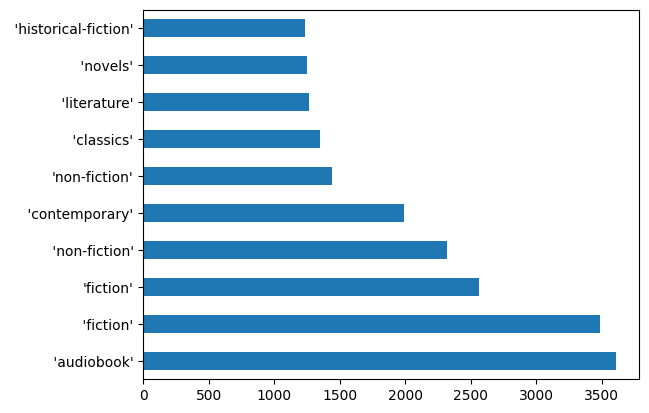

In [21]:
top_genres = dummies.sum().sort_values(ascending=False).head(10)
top_genres.plot(kind='barh')

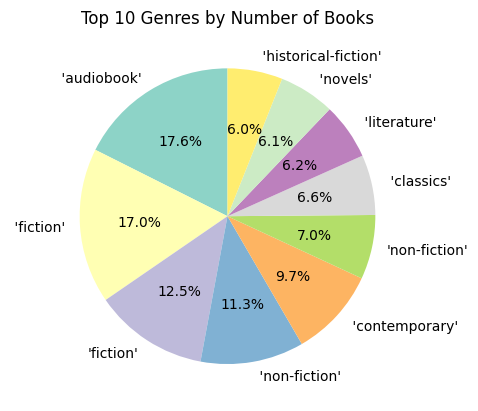

In [22]:
genre_counts = dummies.sum(axis=0)
genre_counts = genre_counts.sort_values(ascending=False)

genre_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 10 Genres by Number of Books')
plt.ylabel('')  
plt.show()

<h3> Converting features into boolean ( which helps in training ) </h3> 

In [23]:
grouped[grouped == 1] = True
grouped[grouped == 0] = False

/tmp/ipykernel_12625/3009346742.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped[grouped == 1] = True
/tmp/ipykernel_12625/3009346742.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  grouped[grouped == 0] = False


In [24]:
grouped

,'15th-century','16th-century','17th-century','18th-century','19th-century','20th-century','21st-century','2nd-grade','abuse','academia',...,'urban-studies','vampires','website-design','westerns','wicca','wine','world-war-ii','writing','young-adult','zombies'
user_id,,,,,,,,,,,,,,,,,,,,,
1-otis-chandler,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
103-alexandra,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
104-daniel,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
106-andrew,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
108-myriam,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92-forest,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95-kirk,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
96-ray,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
f'Average Number of Genres Really liked by a person : {sum([len(grouped.columns[grouped.iloc[i] == 1]) for i in range(118)]) / 118}'

'Average Number of Genres Really liked by a person : 62.11864406779661'

<h1>Training <strong>Apriori</strong> </h1>

In [26]:
from mlxtend.frequent_patterns import apriori, association_rules

In [27]:
# We take min_support = 0.5 to get more reliable rules
frequent_genresets = apriori(grouped, min_support=0.5, use_colnames=True)
frequent_genresets

/home/mahdiiii04/.local/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.508475,( 'adult')
1,0.5,( 'adventure')
2,0.754237,( 'audiobook')
3,0.635593,( 'biography')
4,0.754237,( 'classics')
...,...,...
321,0.5,"( 'non-fiction', 'historical-fiction', 'nove..."
322,0.5,"( 'fiction', 'classics', 'audiobook', 'hist..."
323,0.5,"( 'fiction', 'fiction', 'classics', 'audiobo..."
324,0.508475,"( 'fiction', 'fiction', 'audiobook', 'histor..."


In [28]:
rules = association_rules(frequent_genresets, metric='confidence', min_threshold=0.7, num_itemsets=len(grouped))

In [29]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,( 'adult'),( 'fiction'),0.508475,0.796610,0.500000,0.983333,1.234397,1.0,0.094944,12.203390,0.386324,0.621053,0.918056,0.805496
1,( 'biography'),( 'audiobook'),0.635593,0.754237,0.559322,0.880000,1.166742,1.0,0.079934,2.048023,0.392178,0.673469,0.511724,0.810787
2,( 'audiobook'),( 'biography'),0.754237,0.635593,0.559322,0.741573,1.166742,1.0,0.079934,1.410096,0.581505,0.673469,0.290828,0.810787
3,( 'classics'),( 'audiobook'),0.754237,0.754237,0.627119,0.831461,1.102386,1.0,0.058245,1.458192,0.377912,0.711538,0.314219,0.831461
4,( 'audiobook'),( 'classics'),0.754237,0.754237,0.627119,0.831461,1.102386,1.0,0.058245,1.458192,0.377912,0.711538,0.314219,0.831461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1717,"('fiction', 'historical')","( 'fiction', 'historical-fiction', 'classics')",0.593220,0.567797,0.500000,0.842857,1.484435,1.0,0.163172,2.750385,0.802260,0.756410,0.636415,0.861727
1718,"( 'historical-fiction', 'classics')","( 'fiction', 'fiction', 'historical')",0.635593,0.550847,0.500000,0.786667,1.428103,1.0,0.149885,2.105403,0.822625,0.728395,0.525031,0.847179
1719,"( 'classics', 'historical')","( 'fiction', 'historical-fiction', 'fiction')",0.584746,0.576271,0.500000,0.855072,1.483802,1.0,0.163028,2.923729,0.785195,0.756410,0.657971,0.861360
1720,"( 'historical-fiction', 'historical')","( 'fiction', 'classics', 'fiction')",0.610169,0.584746,0.500000,0.819444,1.401369,1.0,0.143206,2.299870,0.734709,0.719512,0.565193,0.837258


<h3>Testing for high confidence</h3>

In [30]:
filtered_rules = rules[rules['confidence'] > 0.8]

In [31]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,( 'adult'),( 'fiction'),0.508475,0.796610,0.500000,0.983333,1.234397,1.0,0.094944,12.203390,0.386324,0.621053,0.918056,0.805496
1,( 'biography'),( 'audiobook'),0.635593,0.754237,0.559322,0.880000,1.166742,1.0,0.079934,2.048023,0.392178,0.673469,0.511724,0.810787
3,( 'classics'),( 'audiobook'),0.754237,0.754237,0.627119,0.831461,1.102386,1.0,0.058245,1.458192,0.377912,0.711538,0.314219,0.831461
4,( 'audiobook'),( 'classics'),0.754237,0.754237,0.627119,0.831461,1.102386,1.0,0.058245,1.458192,0.377912,0.711538,0.314219,0.831461
5,( 'contemporary'),( 'audiobook'),0.610169,0.754237,0.542373,0.888889,1.178527,1.0,0.082160,2.211864,0.388587,0.659794,0.547893,0.803995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,"( 'historical-fiction', 'classics', 'histori...","( 'fiction', 'fiction')",0.559322,0.644068,0.500000,0.893939,1.387959,1.0,0.139759,3.355932,0.634289,0.710843,0.702020,0.835128
1714,"( 'fiction', 'historical')","( 'historical-fiction', 'classics', 'fiction')",0.601695,0.601695,0.500000,0.830986,1.381075,1.0,0.137963,2.356638,0.692752,0.710843,0.575667,0.830986
1717,"('fiction', 'historical')","( 'fiction', 'historical-fiction', 'classics')",0.593220,0.567797,0.500000,0.842857,1.484435,1.0,0.163172,2.750385,0.802260,0.756410,0.636415,0.861727
1719,"( 'classics', 'historical')","( 'fiction', 'historical-fiction', 'fiction')",0.584746,0.576271,0.500000,0.855072,1.483802,1.0,0.163028,2.923729,0.785195,0.756410,0.657971,0.861360


<h3>Saving the association rules to use them in recommendation</h3>

In [32]:
import joblib

In [33]:
import joblib
joblib.dump(rules, 'AprioriRules.pkl')

['AprioriRules.pkl']

## Testing FP-Growth Algorithm

In [37]:
from mlxtend.frequent_patterns import fpgrowth

res = fpgrowth( grouped , min_support=0.5 , use_colnames=True )

/home/mahdiiii04/.local/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [38]:
res.head(10)

,support,itemsets
0,0.796610,( 'fiction')
1,0.762712,('fiction')
2,0.754237,( 'audiobook')
3,0.754237,( 'classics')
4,0.720339,( 'historical-fiction')
5,0.711864,( 'non-fiction')
6,0.669492,( 'fantasy')
7,0.652542,( 'novels')
8,0.644068,( 'historical')
9,0.635593,( 'history')


In [40]:
fprules = association_rules( res , metric = 'confidence' , min_threshold = 0.7 , num_itemsets=len(grouped) )
fprules.sort_values(['confidence' , 'lift' ] , ascending=False )

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1454,"( 'contemporary', 'novels')",('fiction'),0.542373,0.762712,0.542373,1.0,1.311111,1.0,0.128699,inf,0.518519,0.711111,1.000000,0.855556
1465,"( 'fiction', 'contemporary', 'novels')",('fiction'),0.516949,0.762712,0.516949,1.0,1.311111,1.0,0.122666,inf,0.491228,0.677778,1.000000,0.838889
1525,"( 'historical-fiction', 'contemporary', 'aud...",('fiction'),0.500000,0.762712,0.500000,1.0,1.311111,1.0,0.118644,inf,0.474576,0.655556,1.000000,0.827778
1537,"( 'contemporary', 'fantasy')",('fiction'),0.516949,0.762712,0.516949,1.0,1.311111,1.0,0.122666,inf,0.491228,0.677778,1.000000,0.838889
1547,"( 'fiction', 'contemporary', 'fantasy')",('fiction'),0.508475,0.762712,0.508475,1.0,1.311111,1.0,0.120655,inf,0.482759,0.666667,1.000000,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,('fiction'),"( 'fiction', 'historical-fiction', 'historic...",0.762712,0.567797,0.533898,0.7,1.232836,1.0,0.100833,1.440678,0.795918,0.670213,0.305882,0.820149
323,('fiction'),"( 'audiobook', 'fantasy')",0.762712,0.576271,0.533898,0.7,1.214706,1.0,0.094369,1.412429,0.744898,0.663158,0.292000,0.813235
1670,('fiction'),( 'humor'),0.762712,0.584746,0.533898,0.7,1.197101,1.0,0.087906,1.384181,0.693878,0.656250,0.277551,0.806522
193,('fiction'),"( 'non-fiction', 'audiobook')",0.762712,0.593220,0.533898,0.7,1.180000,1.0,0.081442,1.355932,0.642857,0.649485,0.262500,0.800000


In [42]:
fpfiltered_rules = fprules[ fprules['confidence'] > 0.8 ]
fpfiltered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,( 'fiction'),('fiction'),0.796610,0.762712,0.644068,0.808511,1.060047,1.0,0.036484,1.239171,0.278509,0.703704,0.193009,0.826478
1,('fiction'),( 'fiction'),0.762712,0.796610,0.644068,0.844444,1.060047,1.0,0.036484,1.307506,0.238722,0.703704,0.235185,0.826478
2,( 'fiction'),( 'audiobook'),0.796610,0.754237,0.661017,0.829787,1.100167,1.0,0.060184,1.443856,0.447650,0.742857,0.307410,0.853096
3,( 'audiobook'),( 'fiction'),0.754237,0.796610,0.661017,0.876404,1.100167,1.0,0.060184,1.645609,0.370469,0.742857,0.392322,0.853096
4,( 'audiobook'),('fiction'),0.754237,0.762712,0.644068,0.853933,1.119600,1.0,0.068802,1.624511,0.434664,0.737864,0.384430,0.849189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,"( 'literary-fiction', 'fiction')",( 'audiobook'),0.533898,0.754237,0.500000,0.936508,1.241662,1.0,0.097314,3.870763,0.417565,0.634409,0.741653,0.799715
1718,( 'literary-fiction'),"( 'audiobook', 'fiction')",0.542373,0.644068,0.500000,0.921875,1.431332,1.0,0.150675,4.555932,0.658506,0.728395,0.780506,0.849095
1719,( 'mystery'),( 'audiobook'),0.533898,0.754237,0.508475,0.952381,1.262707,1.0,0.105789,5.161017,0.446364,0.652174,0.806240,0.813269
1720,( 'adult'),( 'fiction'),0.508475,0.796610,0.500000,0.983333,1.234397,1.0,0.094944,12.203390,0.386324,0.621053,0.918056,0.805496


In [43]:
joblib.dump( rules , 'FPgrowthRules.pkl')

['FPgrowthRules.pkl']